In [31]:
#import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt



In [11]:
#load the data
#dataset = pd.read_csv("C:/Users/kikia/OneDrive/Master Smart Systems Engineering/Graduation/Afstudeerproject/Dataset google takeout/Dataset2.txt")
#data = dataset[['DriverId', 'Speed']]
#data = dataset[['DriverId', 'EventName', 'Latitude', 'Longitude', 'Speed', 'ts']]
#print(data.head())

In [12]:
#load the data
dataset = pd.read_csv("C:/Users/kikia/OneDrive/Master Smart Systems Engineering/Graduation/Afstudeerproject/dataset androsensor.txt")
data = dataset[['AccX', 'AccY', 'AccZ', 'GYROSCOPE X', 'GYROSCOPE Y', 'GYROSCOPE Z']]

#convert data into dataframe
df2 = pd.DataFrame(dataset)


#add class for training and testing data
from itertools import repeat
#apo = 'apo'
#onder = 'onder'
#medhi ='medhi'
#selin ='selin'
#hurcan = 'hurcan'

driver1 = '1'
driver2 = '2'
driver3 = '3'
driver4 = '4'
driver5 = '5'
driver6= '6'
driver7 = '7'


#new_list = []
#new_list.extend(repeat(apo, 29))
#new_list.append(onder)
#new_list.extend(repeat(onder, 28))
#new_list.append(medhi)
#new_list.extend(repeat(medhi, 28))
#new_list.append(selin)
#new_list.extend(repeat(selin, 28))
#new_list.append(hurcan)
#new_list.extend(repeat(hurcan, 28))
#print(new_list)

new_list = []
new_list.extend(repeat(driver1, 300))
new_list.append(driver1)
new_list.extend(repeat(driver2, 300))
new_list.append(driver2)
new_list.extend(repeat(driver3, 300))
new_list.append(driver3)
new_list.extend(repeat(driver4, 299))
new_list.append(driver4)
new_list.extend(repeat(driver5, 299))
new_list.append(driver5)
new_list.extend(repeat(driver6, 299))
new_list.append(driver6)
new_list.extend(repeat(driver7, 299))
new_list.append(driver7)


#add list to dataset
#make list into a series
column_values = pd.Series(new_list)
#insert function to add column
data.insert(loc=0, column='class', value=new_list)

print(data.head())
print(data.describe())



       class    AccX    AccY    AccZ  GYROSCOPE X  GYROSCOPE Y  GYROSCOPE Z
0.3230     1 -0.9718  9.7884 -0.0059       0.0016       0.0010       -80.92
0.3206     1 -0.9517  9.8121  0.0037      -0.0009       0.0007       -80.78
0.3173     1 -0.9517  9.8028 -0.0098      -0.0011      -0.0001       -80.73
0.3416     1 -0.7777  9.8351  0.0081      -0.0023       0.0013       -80.80
0.4765     1 -0.1762  9.8303  0.1220      -0.0025      -0.0246       -78.71
              AccX         AccY         AccZ  GYROSCOPE X  GYROSCOPE Y  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean     -0.935313     9.801427     0.004761     0.001087    -0.012049   
std       0.926932     0.259517     0.335694     0.016885     0.117035   
min      -5.957800     6.812400    -2.675900    -0.094300    -0.741100   
25%      -1.287600     9.700050    -0.068200    -0.005700    -0.012600   
50%      -0.990600     9.796500    -0.002900     0.000100    -0.000700   
75%      -0.706650     9.8

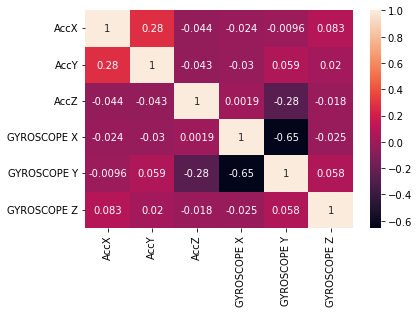

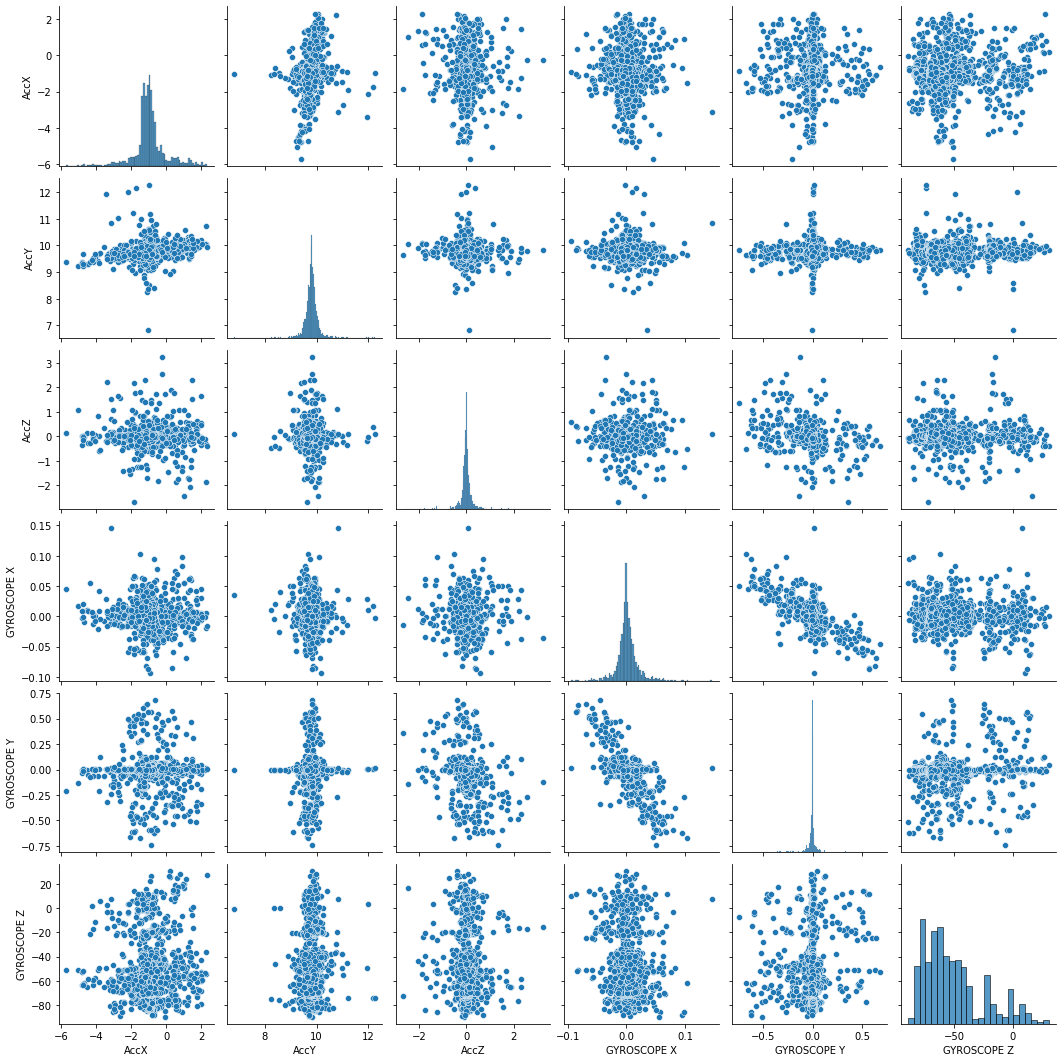

AccX                       0
AccY                       0
AccZ                       0
LINEAR ACCELERATION X      0
LINEAR ACCELERATION Y      0
LINEAR ACCELERATION Z      0
GYROSCOPE X                0
GYROSCOPE Y                0
GYROSCOPE Z                0
MAGNETIC FIELD X           0
MAGNETIC FIELD Y           0
MAGNETIC FIELD Z           0
YYYY-MO-DD HH-MI-SS_SSS    0
dtype: int64

In [13]:
sns.heatmap(data.corr(), annot = True)
plt.show()

data = data[~data.index.duplicated()]  #get rid of indexes that are duplicated
#df2 = df2[~df2.index.duplicated()]


sns.pairplot(data)
plt.show()

dataset.isnull().sum()

In [42]:
#feature selection
#split data in features and target variables
feature_cols = ['AccX', 'AccY', 'AccZ', 'GYROSCOPE X', 'GYROSCOPE Y', 'GYROSCOPE Z']
#feature_cols = ['DriverId', 'Speed']
X = data[feature_cols] #Features
y = data[['class']].values.ravel() #target variable
#X = data[['AccX', 'AccY', 'AccZ', 'GYROSCOPE X', 'GYROSCOPE Y', 'GYROSCOPE Z']].values
#y = data[['class']].values




In [108]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

scaler = preprocessing.StandardScaler().fit(X_train)
#y = le.fit_transform(y, warning=True)

In [109]:
#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Accuracy tree: 0.6756756756756757
              precision    recall  f1-score   support

           0       0.61      0.56      0.59        82
           1       0.57      0.69      0.62        80
           2       0.63      0.63      0.63        82
           3       0.73      0.56      0.64        64
           4       0.58      0.70      0.64        64
           5       0.82      0.73      0.77        51
           6       0.96      0.93      0.95        58

    accuracy                           0.68       481
   macro avg       0.70      0.69      0.69       481
weighted avg       0.69      0.68      0.68       481

Confusion matrix tree: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000024F89E69E80>
Accuracy reg: 0.45322245322245325
              precision    recall  f1-score   support

           0       0.34      0.57      0.42        82
           1       0.39      0.33      0.35        80
           2       0.39      0.51      0.44        82
  

C:\Users\kikia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kikia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


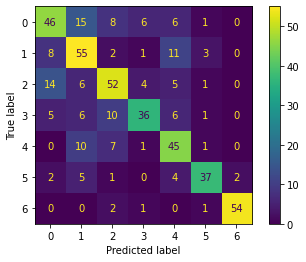

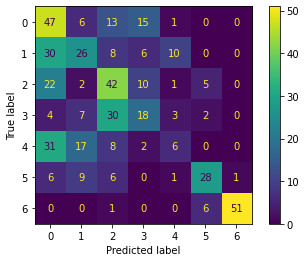

In [118]:
#building decision tree model
#create decision tree classifier object
clf_tree = DecisionTreeClassifier()
clf_reg = LogisticRegression(solver='lbfgs', max_iter=10000)

#train decision tree classifier
clf_tree = clf_tree.fit(X_train, y_train)
clf_reg = clf_reg.fit(X_train, y_train)



#predict response for test dataset
y_pred_tree = clf_tree.predict(X_test)
y_pred_reg = clf_reg.predict(X_test)

#evaluating model
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("Accuracy tree:", metrics.accuracy_score(y_test, y_pred_tree))
print(metrics.classification_report(y_test, y_pred_tree))
#print("Class_report:", metrics.classification_report(y_test, y_pred))
print("Confusion matrix tree:", metrics.plot_confusion_matrix(clf_tree, X_test, y_test))

#model accuracy, how often is the classifier correct?
print("Accuracy reg:", metrics.accuracy_score(y_test, y_pred_reg))
print(metrics.classification_report(y_test, y_pred_reg))
#print("Class_report:", metrics.classification_report(y_test, y_pred))
print("Confusion matrix reg:", metrics.plot_confusion_matrix(clf_reg, X_test, y_test))


In [124]:
y_score1 = clf_tree.fit(X_train, y_train).predict_proba(X_test)
y_score2 = clf_reg.fit(X_train, y_train).predict_proba(X_test)

print(roc_auc_score(y_test, y_score1, multi_class='ovr'))
print(roc_auc_score(y_test, y_score2, multi_class='ovr'))
#print(y_score1)

#reshape data
y_score1 = clf_tree.fit(X_train, y_train).predict_proba(X_test)[:,1]
y_score2 = clf_reg.fit(X_train, y_train).predict_proba(X_test)[:,1]


0.8109315095256772
0.8011281490032053


In [125]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1, pos_label=1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2, pos_label=1)

#print('roc_auc_score for DecisionTree:', roc_auc_score(y_test, y_score1)
#print('roc_auc_score for Logistic Regression:', roc_auc_score(y_test, y_score2)

In [56]:
from sklearn.metrics import RocCurveDisplay

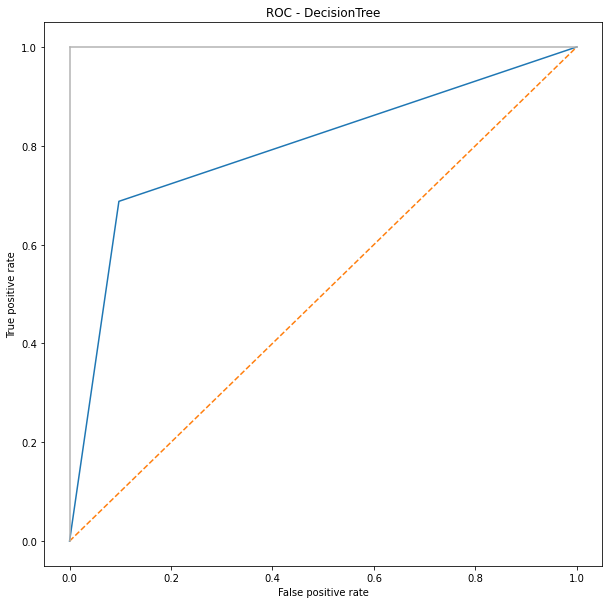

In [126]:
plt.subplots(1, figsize=(10, 10))

plt.title('ROC - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

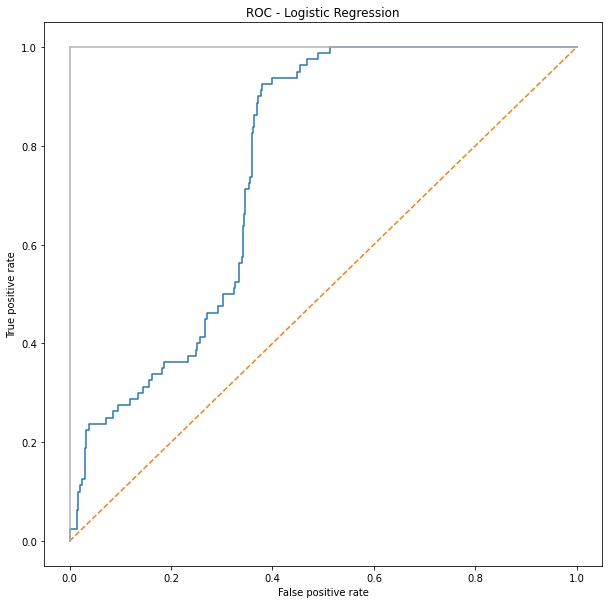

In [127]:
plt.subplots(1, figsize=(10, 10))
plt.title('ROC - Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [28]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
               filled= True, rounded=True,
               special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('test.png')
Image(graph.create_png())

In [50]:
"""Optimizing Decision Tree Performance"""
#Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

#Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#predict response for test dataset
y_pred = clf.predict(X_test)

#Model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6988906497622821


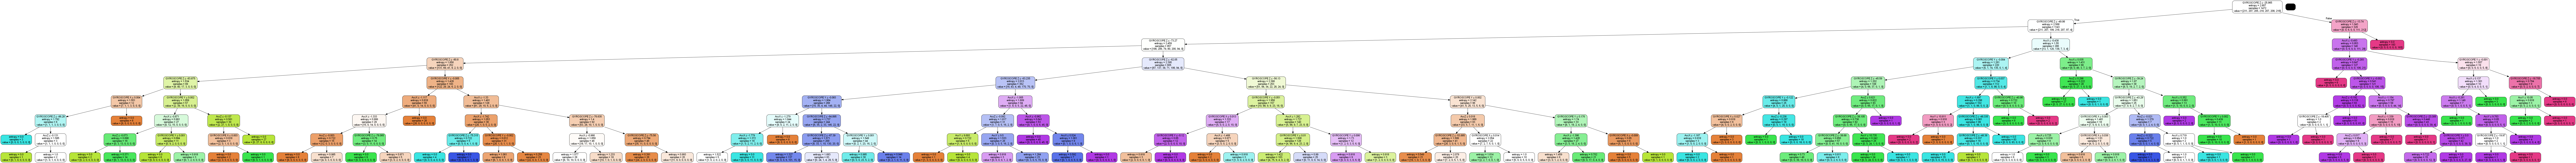

In [51]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('test2.png')
Image(graph.create_png())